In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/For_AI_Training/METAL_HW/METAL.zip' -d '/content/METAL'

Archive:  /content/gdrive/MyDrive/For_AI_Training/METAL_HW/METAL.zip
   creating: /content/METAL/METAL/
   creating: /content/METAL/METAL/NEU Metal Surface Defects Data/
   creating: /content/METAL/METAL/NEU Metal Surface Defects Data/test/
   creating: /content/METAL/METAL/NEU Metal Surface Defects Data/test2/
  inflating: /content/METAL/METAL/NEU Metal Surface Defects Data/test2/Cr_1.bmp  
  inflating: /content/METAL/METAL/NEU Metal Surface Defects Data/test2/Cr_10.bmp  
  inflating: /content/METAL/METAL/NEU Metal Surface Defects Data/test2/Cr_100.bmp  
  inflating: /content/METAL/METAL/NEU Metal Surface Defects Data/test2/Cr_101.bmp  
  inflating: /content/METAL/METAL/NEU Metal Surface Defects Data/test2/Cr_102.bmp  
  inflating: /content/METAL/METAL/NEU Metal Surface Defects Data/test2/Cr_103.bmp  
  inflating: /content/METAL/METAL/NEU Metal Surface Defects Data/test2/Cr_104.bmp  
  inflating: /content/METAL/METAL/NEU Metal Surface Defects Data/test2/Cr_105.bmp  
  inflating: /cont

In [ ]:
from PIL import Image, ImageFilter, ImageStat
import matplotlib.pyplot as plt
import pandas as pd
import cv2, glob
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy
import scipy.misc
import imageio
from skimage.transform import resize
from skimage import data

import PIL
import os 
import itertools
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve, KFold, cross_val_score, StratifiedKFold
import sklearn
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, model_from_json

from keras.layers import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten, Conv2D, MaxPool2D, BatchNormalization, MaxPooling2D, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
from keras.callbacks import  ReduceLROnPlateau, ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from keras import backend as K
%matplotlib inline
os.chdir('/content/METAL/METAL/NEU Metal Surface Defects Data/test2')


In [ ]:
def createModel():
  batch_size = 128
  num_class = 6
  epochs = 60
  img_rows, img_cols = X_train.shape[1], X_train.shape[2]
  input_shape = (img_rows, img_cols, 3)
  model = Sequential()
  model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same',
            activation = 'relu', input_shape = input_shape))
  model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same',
            activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same',
            activation = 'relu'))
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same',
            activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Conv2D(filters = 86, kernel_size = (3, 3), padding = 'same',
            activation = 'relu'))
  model.add(Conv2D(filters = 86, kernel_size = (3, 3), padding = 'same',
            activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(1024, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(512, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(6, activation = "softmax"))
  optimizer = RMSprop(lr = 0.001, decay = 1e-6)
  model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics =["accuracy"])
  print(model.summary())
  return model

In [ ]:
def fitModel(a, b, model):

  epochs = 40
  img_rows, img_cols = X_train.shape[1], X_train.shape[2]
  input_shape = (img_rows, img_cols, 3)

  datagen = ImageDataGenerator(
      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False
  )
  # datagen.fit(a.reshape(900, 64, 64, 1))
  # img = np.expand_dims(img, 0)
  datagen.fit(a)
  # train_images = (np.expand_dims(train_images, axis=3))
  history = model.fit_generator(datagen.flow(a, b, batch_size=32),
                  steps_per_epoch=len(a) / 32, epochs=epochs)
  return model

In [ ]:
dict_characters={0:'Cr',1:'In',2:'Pa',
        3:'PS',4:'RS',5:'Sc'}

In [ ]:
dict_characters_fullname={0:'Crazing',1:'Inclusion',2:'Patches',
             3:'Pitted',4:'Rolled',5:'Scratches'}

In [ ]:
img_size=64
from os import listdir
directory_name="/content/METAL/METAL/NEU Metal Surface Defects Data/train"
def load_train_set(dirname, dict_characters):
  X_train = []
  Y_train = []
  for label, character in dict_characters.items():
    list_images = os.listdir(dirname+'/'+character)
    for image_name in list_images[0:150]:
      image= imageio.imread(dirname+'/'+character+'/'+image_name)
      X_train.append(resize(image,(img_size,img_size,3)))
      Y_train.append(label)
  return np.array(X_train), np.array(Y_train)

X_train, Y_train = load_train_set("/content/METAL/METAL/NEU Metal Surface Defects Data/train",dict_characters_fullname)

In [ ]:
import os, random, shutil, pathlib

def copyFile(fileDir):

	pathDir = os.listdir(fileDir)
	sample = random.sample(pathDir, 1)
	name = sample[0]
	while os.path.isfile(tarDir+name):
	  sample = random.sample(pathDir, 1)
	  name = sample[0]
	shutil.copyfile(fileDir+"/"+name, tarDir+name)
	print(sample)
	pass
if __name__ == '__main__':
  for i in range(4):
    for v in dict_characters_fullname.values():
      fileDir = "/content/METAL/METAL/NEU Metal Surface Defects Data/valid/"+ v
      tarDir = "/content/METAL/METAL/NEU Metal Surface Defects Data/vaild_random/"
      if not os.path.isdir(tarDir):
        os.mkdir(tarDir)
      copyFile(fileDir)
      
  n = random.randint(0,5)
  v = dict_characters_fullname[n]
  fileDir = "/content/METAL/METAL/NEU Metal Surface Defects Data/valid/"+ v
  tarDir = "/content/METAL/METAL/NEU Metal Surface Defects Data/vaild_random/"
  copyFile(fileDir)

['Cr_112.bmp']
['In_110.bmp']
['Pa_116.bmp']
['PS_110.bmp']
['RS_111.bmp']
['Sc_114.bmp']
['Cr_110.bmp']
['In_114.bmp']
['Pa_118.bmp']
['PS_119.bmp']
['RS_113.bmp']
['Sc_115.bmp']
['Cr_114.bmp']
['In_119.bmp']
['Pa_12.bmp']
['PS_12.bmp']
['RS_11.bmp']
['Sc_110.bmp']
['Cr_11.bmp']
['In_111.bmp']
['Pa_112.bmp']
['PS_118.bmp']
['RS_12.bmp']
['Sc_112.bmp']
['Sc_113.bmp']


In [ ]:
def load_test_set(dirname,dict_characters):
    X_test = []
    Y_test = []
    for image_name in os.listdir(dirname):
      if 'bmp' in image_name:
        print(image_name)
        character_name = "_".join(image_name.split('_')[:-1])
        label = [label for label,character in dict_characters.items() if character == character_name][0]
        image = imageio.imread(dirname+'/'+image_name)
        X_test.append(resize(image,(img_size,img_size,3)))
        Y_test.append(label)
    
    return np.array(X_test), np.array(Y_test)

X_test,Y_test = load_test_set("/content/METAL/METAL/NEU Metal Surface Defects Data/vaild_random", dict_characters)


Cr_114.bmp
Pa_112.bmp
Pa_118.bmp
RS_12.bmp
Cr_110.bmp
Cr_11.bmp
Pa_116.bmp
In_110.bmp
PS_110.bmp
PS_119.bmp
PS_12.bmp
Sc_113.bmp
In_119.bmp
Pa_12.bmp
RS_113.bmp
Sc_115.bmp
PS_118.bmp
Cr_112.bmp
Sc_112.bmp
RS_11.bmp
In_114.bmp
Sc_114.bmp
Sc_110.bmp
RS_111.bmp
In_111.bmp


In [ ]:
Y_train=to_categorical(Y_train,num_classes=6)
Y_test=to_categorical(Y_test,num_classes=6)

In [ ]:
def plot_confusion_matrix(cm,classes,normaliz=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.figure(figsize=(10,10))
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=90)
  plt.yticks(tick_marks,classes)
  
  thresh=cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
        horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model = createModel()
model = fitModel(X_train,Y_train,model)

model.save('/content/gdrive/MyDrive/For_AI_Training/METAL_HW/METAL.h5')
#

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        3

In [ ]:
def evaluateModel(model,c,d):
  score=model.evaluate(c,d,verbose=0)
  print('\nKeras CNN #2B - accuracy: ',score[1])
  print('')
  y_pred = model.predict(c)
  print("\n",sklearn.metrics.classification_report(np.where(d>0)[1],np.argmax(y_pred,axis=1),
          target_names=list(dict_characters_fullname.values())))
  Y_pred_classes=np.argmax(y_pred,axis=1)
  Y_true=np.argmax(d,axis=1)
  confusion_mtx=confusion_matrix(Y_true,Y_pred_classes)
  plot_confusion_matrix(confusion_mtx,classes=list(dict_characters_fullname.values()))


Keras CNN #2B - accuracy:  0.6399999856948853



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



               precision    recall  f1-score   support

     Crazing       0.40      1.00      0.57         4
   Inclusion       0.00      0.00      0.00         4
     Patches       1.00      1.00      1.00         4
      Pitted       0.60      0.75      0.67         4
      Rolled       0.00      0.00      0.00         4
   Scratches       0.83      1.00      0.91         5

    accuracy                           0.64        25
   macro avg       0.47      0.62      0.52        25
weighted avg       0.49      0.64      0.54        25



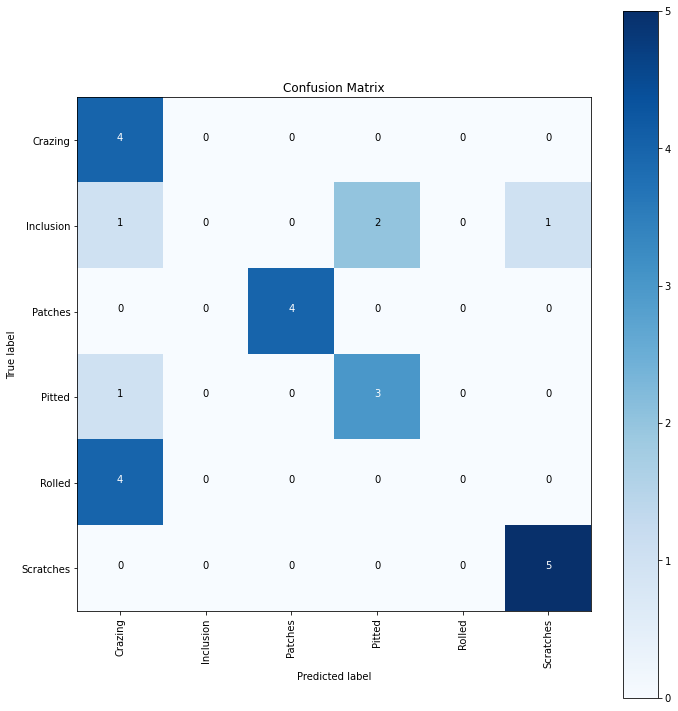

In [ ]:
evaluateModel(model,X_test,Y_test)